# DenseNet Model One
The purpose of this notebook is to test three different dataset types: 
* **Unscattered**
* **Scattered**
* **Stationary**

We want to see if our **DenseNet** Architecture can predict the given glasses. 

## Unscattered
Our **Unscattered** dataset is our initial dataset created with **Notebook 3**. This dataset contains three classes:
* **Buy**
* **Sell**
* **Hold**

The majority of this dataset contains **Hold** images as **Buy** was classified when **20th** day had a greater than **2% increase** from **15th day**. 

## Scattered 
This dataset is very similar from **Unscattered** and is derived from the same directory as **Unscattered**. What we did is remove all **Hold** images, therefor making a binary classification problem of:
* **Sell**
* **Buy** 

The reason for this is, Buy & Sell are more 'visible' to the human eye, whereas hold contains much more noisy data and was hard to define. 

Given it comes from **Unscattered** this dataset has much less images.

## Stationary
This dataset is also a **binary classification problem** as we aim to classify:
* **Sell**
* **Buy**

We **labeled** each image as follows:
```python
if day_16_stationary_close > 0:
    label = 'buy'
else:
    label = 'sell'
```

We calculate **Stationary Close** by taking the difference:
```python
stationary_close = df['close'].diff()
df['Stationary_Close'] = stationary_close
```

This creates a non-zero effect. 

# Goal & Hypothesis
Our goal is simple. Can a **Convolutional Neural Network** learn buy/sell/hold patterns from simple **Chart** data with a few **Technicals (3)**? 

Given the nature of a **seasoned trader** we believe we can achieve **~70% Accuracy**.

In [4]:
import torch
from torchvision.models import *
from fastai.vision import *

import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Unscattered DataSet

In [19]:
# Getting paths for this dataset
images_path = f'{os.curdir}/data/model_data/images_unscattered'
labels_path = f'{os.curdir}/data/model_data/unscattered.csv'
path = f'{os.curdir}/data/model_data'

In [11]:
# Getting labels df
df = pd.read_csv(labels_path)

In [18]:
df['label'].value_counts()

Hold    2091
Sell     471
Buy       68
Name: label, dtype: int64

### Data Object

In [61]:
tfms_ = get_transforms(do_flip=False, flip_vert=False, max_rotate=0.0, max_zoom=0.0, max_lighting=0.0, max_warp=0.0)

# source object
src = (ImageItemList.from_csv(path, csv_name='unscattered.csv', folder='images_unscattered', suffix='.png')
                    .split_by_idx(list(range(2400,2630)))
                    .label_from_df())

# Creating data object functions - return data object
def get_data(image_size, batch_size):
    data = (src.transform(tfms=tfms_, size=image_size)
               .databunch(num_workers=2, bs=batch_size).normalize(imagenet_stats))
    return data

In [62]:
# 600 × 400
data = get_data((200,300), 16)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


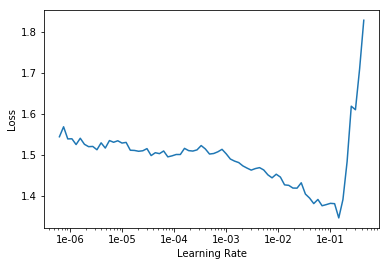

In [47]:
# First run
arch = densenet169
learn = create_cnn(data, arch, metrics=[accuracy])

learn.lr_find()
learn.recorder.plot()

In [48]:
lr = 1e-2
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy
1,0.740430,0.756845,0.704348
2,0.691315,1.022258,0.626087
3,0.603748,0.949459,0.760870
4,0.508516,0.717690,0.760870
5,0.372101,0.807523,0.752174


## Scattered Dataset

In [51]:
# Getting paths for this dataset
images_path = f'{os.curdir}/data/model_data/images_scattered'
labels_path = f'{os.curdir}/data/model_data/scattered.csv'
path = f'{os.curdir}/data/model_data'

In [63]:
# Getting labels df
df = pd.read_csv(labels_path)

In [65]:
df.head(3)

,image_name,label
0,18.Buy,Buy
1,20.Buy,Buy
2,22.Buy,Buy


In [66]:
df['label'].value_counts()

Sell    471
Buy      68
Name: label, dtype: int64

### Data Object

In [71]:
tfms_ = get_transforms(do_flip=False, flip_vert=False, max_rotate=0.0, max_zoom=0.0, max_lighting=0.0, max_warp=0.0)

# source object
src = (ImageItemList.from_csv(path, csv_name='scattered.csv', folder='images_scattered', suffix='.png')
                    .split_by_idx(list(range(480,539)))
                    .label_from_df())

# Creating data object functions - return data object
def get_data(image_size, batch_size):
    data = (src.transform(tfms=tfms_, size=image_size)
               .databunch(num_workers=2, bs=batch_size).normalize(imagenet_stats))
    return data

In [72]:
# 600 × 400
data = get_data((200,300), 16)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


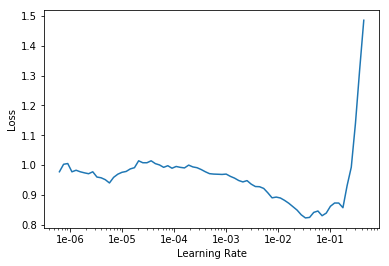

In [84]:
# Creating test model
arch = densenet201
learn = create_cnn(data, arch, metrics=[accuracy])

learn.lr_find()
learn.recorder.plot()

In [85]:
lr = 7e-3
learn.fit_one_cycle(5,slice(lr))

epoch,train_loss,valid_loss,accuracy
1,0.840070,1.082693,0.576271
2,0.480626,0.932273,0.745763
3,0.288930,0.922773,0.779661
4,0.170289,1.094979,0.779661
5,0.108772,1.106959,0.796610


## Stationary Dataset

In [22]:
# Getting paths for this dataset
images_path = f'{os.curdir}/data/model_data/images_stationary'
labels_path = f'{os.curdir}/data/model_data/stationary.csv'
path = f'{os.curdir}/data/model_data'

In [23]:
df = pd.read_csv(labels_path)
df.head(3)

,image_name,label
0,1.Buy,Buy
1,2.Sell,Sell
2,3.Sell,Sell


In [24]:
df['label'].value_counts()

Sell    1361
Buy     1260
Name: label, dtype: int64

### Data Object

In [10]:
tfms_ = get_transforms(do_flip=False, flip_vert=False, max_lighting=0.0, max_rotate=0.0, max_warp=0.0, max_zoom=0.0)

# source object
src = (ImageItemList.from_csv(path, csv_name='stationary.csv', folder='images_stationary', suffix='.png')
                    .split_by_idx(list(range(2400,2621)))
                    .label_from_df())

# Data object creation function
def get_data(image_size, batch_size):
    data = (src.transform(tfms=tfms_, size=image_size)
               .databunch(num_workers=2, bs=batch_size).normalize(imagenet_stats))
    
    return data

In [11]:
data = get_data((200,300), 16)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


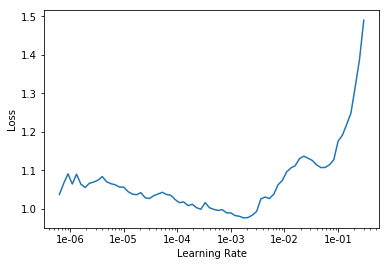

In [12]:
# First attempt
arch = densenet201
learn = create_cnn(data, arch, metrics=[accuracy])

learn.lr_find()
learn.recorder.plot()

In [13]:
lr = 7e-4
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy
1,0.991688,0.861091,0.497738
2,0.893987,0.806912,0.506787
3,0.722178,0.760515,0.542986
4,0.619916,0.733174,0.556561
5,0.536856,0.747046,0.565611


# Unscattered - random_split_by_pct
Experiment with our validation set being split randomly

In [14]:
# Getting paths for this dataset
images_path = f'{os.curdir}/data/model_data/images_unscattered'
labels_path = f'{os.curdir}/data/model_data/unscattered.csv'
path = f'{os.curdir}/data/model_data'

In [15]:
df = pd.read_csv(labels_path)
df.head(3)

,image_name,label
0,1.Hold,Hold
1,2.Hold,Hold
2,3.Hold,Hold


In [17]:
tfms_ = get_transforms(do_flip=False, flip_vert=False, max_rotate=0.0, max_zoom=0.0, max_lighting=0.0, max_warp=0.0)

# source object
seed = np.random.seed(42)
src = (ImageItemList.from_csv(path, csv_name='unscattered.csv', folder='images_unscattered', suffix='.png')
                    .random_split_by_pct(0.1,seed)
                    .label_from_df())

# Creating data object functions - return data object
def get_data(image_size, batch_size):
    data = (src.transform(tfms=tfms_, size=image_size)
               .databunch(num_workers=2, bs=batch_size).normalize(imagenet_stats))
    return data

In [18]:
data = get_data((200,300), 16)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


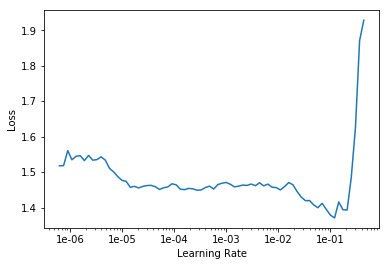

In [19]:
arch = densenet201
learn = create_cnn(data, arch, metrics=[accuracy])

learn.lr_find()
learn.recorder.plot()

In [20]:
lr = 3e-2
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy
1,0.806217,1.320500,0.536122
2,0.726706,0.872566,0.756654
3,0.632538,1.688303,0.737643
4,0.577975,4.705828,0.787072
5,0.451345,2.273147,0.821293


# Unscattered - Data Augmentation
Experimenting with data augmentation. Given the nature of the dataset, we will just implement:
* zoom
* lighting

In [30]:
tfms_ = get_transforms(do_flip=False, flip_vert=False, max_rotate=0.0, max_zoom=0.2, max_lighting=0.1, max_warp=0.0)

# source object
seed = np.random.seed(42)
src = (ImageItemList.from_csv(path, csv_name='unscattered.csv', folder='images_unscattered', suffix='.png')
                    .random_split_by_pct(0.1,seed)
                    .label_from_df())

# Creating data object functions - return data object
def get_data(image_size, batch_size):
    data = (src.transform(tfms=tfms_, size=image_size)
               .databunch(num_workers=2, bs=batch_size).normalize(imagenet_stats))
    return data

In [31]:
data = get_data((200,300), 16)

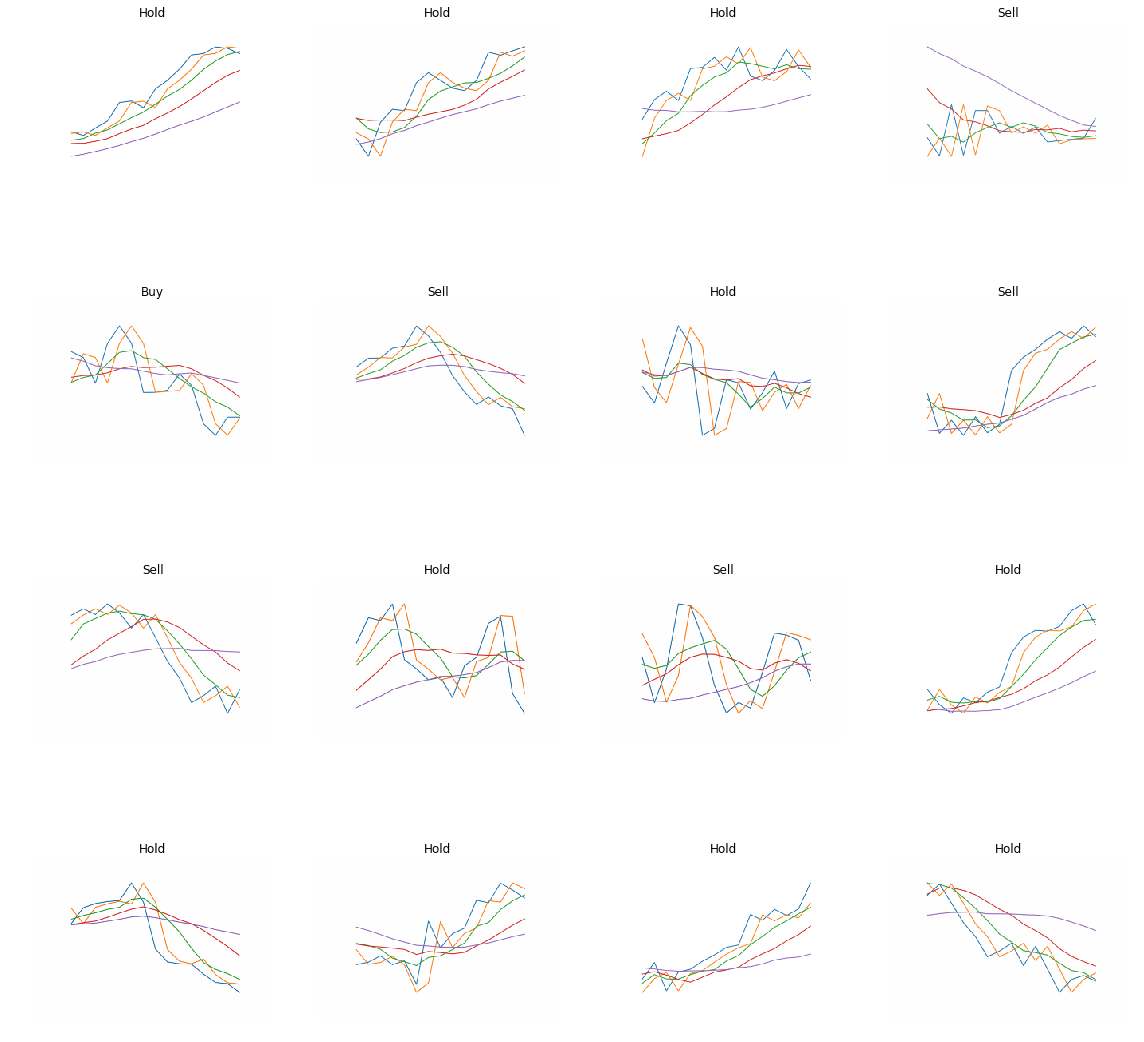

In [35]:
data.show_batch()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


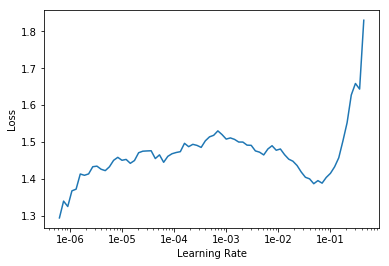

In [36]:
arch = densenet201
learn = create_cnn(data, arch, metrics=[accuracy])

learn.lr_find()
learn.recorder.plot()

In [37]:
lr = 1e-2
learn.fit_one_cycle(5,slice(lr))

epoch,train_loss,valid_loss,accuracy
1,0.774450,0.614830,0.760456
2,0.698346,0.602295,0.802281
3,0.575368,0.616959,0.775665
4,0.491990,0.664719,0.802281
5,0.353276,0.551009,0.802281


## Scattered - Data Augmentation

In [45]:
# Getting paths for this dataset
images_path = f'{os.curdir}/data/model_data/images_scattered'
labels_path = f'{os.curdir}/data/model_data/scattered.csv'
path = f'{os.curdir}/data/model_data'

In [46]:
df = pd.read_csv(labels_path)
df.head(3)

,image_name,label
0,18.Buy,Buy
1,20.Buy,Buy
2,22.Buy,Buy


In [52]:
df['label'].value_counts()

Sell    471
Buy      68
Name: label, dtype: int64

In [48]:
tfms_ = get_transforms(do_flip=False, flip_vert=False, max_lighting=0.2, max_rotate=0.0, max_warp=0.0, max_zoom=0.1)

# source object
src = (ImageItemList.from_csv(path, csv_name='scattered.csv', folder='images_scattered', suffix='.png')
                    .split_by_idx(list(range(480,539)))
                    .label_from_df())

# Data object creation function
def get_data(image_size, batch_size):
    data = (src.transform(tfms=tfms_, size=image_size)
               .databunch(num_workers=2, bs=batch_size).normalize(imagenet_stats))
    
    return data

In [49]:
data = get_data((200,300),16)

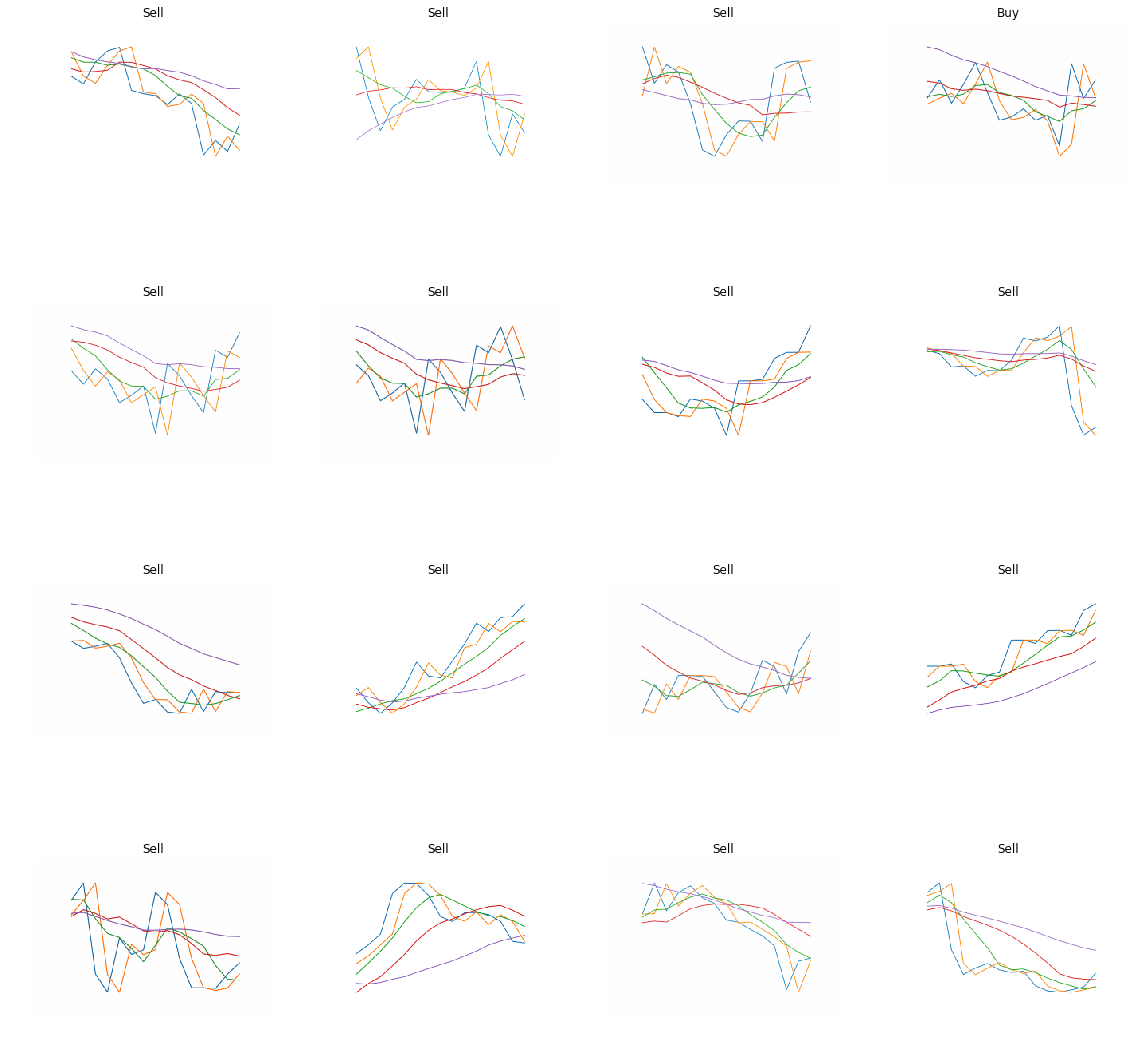

In [50]:
data.show_batch()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


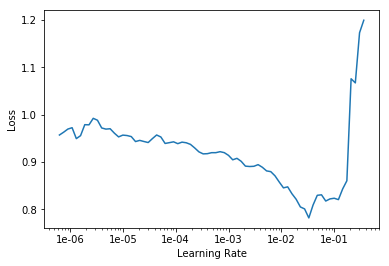

In [56]:
arch = densenet201
learn = create_cnn(data, arch, metrics=[accuracy])

learn.lr_find()
learn.recorder.plot()

In [57]:
lr = 7e-3
learn.fit_one_cycle(5,slice(lr))

epoch,train_loss,valid_loss,accuracy
1,0.776332,0.912470,0.559322
2,0.426704,0.768524,0.796610
3,0.260060,0.977019,0.796610
4,0.180167,1.130670,0.779661
5,0.111845,1.122843,0.796610
